In [3]:
as as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import pickle

pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 99)
pd.set_option('display.max_colwidth', None)

### NYC Parking Violations and Results

In [5]:
# Load parking violation data
# URL: https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2021/kvfd-bves
fp = '/Users/blake/Box/Project/Data/'
df = pd.read_csv(fp + 'Parking_Violations_Issued_-_Fiscal_Year_2021.csv', low_memory=False)
# data_dict = data_dict.drop(columns=['Unnamed: 3']).dropna()

display(df.head())
display(df.info())

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,...,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1471497410,HZH8177,NY,PAS,07/02/2020,20.0,SUBN,NISSA,P,62200.0,33525.0,33640.0,20220510.0,100.0,100.0,100.0,955757.0,0100,0000,1259P,...,105-00,SHORE FRONT PKWY,NaN,0.0,408.0,D,NaN,BBBBBBB,ALL,ALL,GRAY,0.0,2018.0,-,0.0,NaN,NaN,NaN,NaN,NaN
1,1471497630,JCX5781,NY,PAS,06/27/2020,20.0,P-U,DODGE,P,60790.0,34190.0,34240.0,20200909.0,100.0,100.0,100.0,952795.0,0100,0000,0940A,...,120-15,ROCKAWAY BEACH BLVD,NaN,0.0,408.0,D,NaN,BBBBBBB,ALL,ALL,BLU,0.0,2018.0,-,0.0,NaN,NaN,NaN,NaN,NaN
2,1471497641,HEK2391,NY,PAS,06/27/2020,20.0,SUBN,KIA,P,60790.0,40404.0,40404.0,20220306.0,100.0,100.0,100.0,952795.0,0100,0000,0940A,...,120-185,ROCKAWAY BEACH BLVD,NaN,0.0,408.0,D,NaN,BBBBBBB,ALL,ALL,BLU,0.0,2020.0,-,0.0,NaN,NaN,NaN,NaN,NaN
3,1471497653,GWY9859,NY,PAS,06/27/2020,20.0,SUBN,JEEP,P,60790.0,34190.0,34240.0,20210506.0,100.0,100.0,100.0,952795.0,0100,0000,0940A,...,120-07,ROCKAWAY BEACH BLVD,NaN,0.0,408.0,D,NaN,BBBBBBB,ALL,ALL,BLK,0.0,2009.0,-,0.0,NaN,NaN,NaN,NaN,NaN
4,1471497665,HEZ5501,NY,PAS,06/27/2020,20.0,SUBN,SUBAR,P,60790.0,34190.0,34240.0,20220524.0,100.0,100.0,100.0,952795.0,0100,0000,0940A,...,120-03,ROCKAWAY BEACH BLVD,NaN,0.0,408.0,D,NaN,BBBBBBB,ALL,ALL,BLK,0.0,2015.0,-,0.0,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398819 entries, 0 to 5398818
Data columns (total 43 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Summons Number                     object 
 1   Plate ID                           object 
 2   Registration State                 object 
 3   Plate Type                         object 
 4   Issue Date                         object 
 5   Violation Code                     float64
 6   Vehicle Body Type                  object 
 7   Vehicle Make                       object 
 8   Issuing Agency                     object 
 9   Street Code1                       float64
 10  Street Code2                       float64
 11  Street Code3                       float64
 12  Vehicle Expiration Date            float64
 13  Violation Location                 float64
 14  Violation Precinct                 float64
 15  Issuer Precinct                    float64
 16  Issuer Code       

None

In [6]:
# Pickle for faster save/load time
df.to_pickle(fp + 'df_Parking_Violations_Issued.pkl')

In [2]:
# Load Pickle
fp = '/Users/blakesha/Documents/Coding/Interviews/TDI/Project/'
df = pd.read_pickle(fp + 'df_Parking_Violations_Issued.pkl')

In [7]:
# Change date cols to type datetime
dt_pattern = r'Date|Time'
date_cols = [col for col in df.columns if re.search(dt_pattern, col)]

for col_name in date_cols: 
    df[col_name] = pd.to_datetime(df[col_name], errors='coerce')

In [4]:
df.groupby('Registration State').count().sort_values(by='Summons Number', ascending=False)

,Summons Number,Plate ID,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,...,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
Registration State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NY,11120354,11120287,11120354,11120354,11120354,11109580,11098041,11120354,11120354,11120354,11120354,11120354,7073309,11120354,11120354,11120354,7079171,7025614,2,11,...,7000863,11119487,5045551,11120354,11120354,11118819,4041220,7065757,3858664,3858660,11101745,368973,11120354,999630,11120354,6656719,8429953,0,0,0
NJ,1493920,1493920,1493920,1493920,1493920,1488323,1491652,1493920,1493920,1493920,1493920,1493920,1082479,1493920,1493920,1493920,1083607,1075572,0,0,...,1071162,1493769,585029,1493920,1493920,1493740,410316,1081111,630841,630840,1133411,64101,1493920,156759,1493920,1011492,1036578,0,0,0
PA,473865,473864,473865,473865,473865,469729,473048,473865,473865,473865,473865,473865,310651,473865,473865,473865,310924,306855,0,0,...,306926,473818,209819,473865,473865,473826,162943,309905,186267,186267,310996,27880,473865,49169,473865,278980,339540,0,0,0
FL,295261,295261,295261,295261,295261,294333,294841,295261,295261,295261,295261,295261,178429,295261,295261,295261,178561,176754,0,0,...,176462,295243,142184,295261,295261,295236,116702,178114,111174,111174,293285,14122,295261,27166,295261,162634,214818,0,0,0
CT,222755,222755,222755,222755,222755,221775,222468,222755,222755,222755,222755,222755,154985,222755,222755,222755,155116,153752,0,0,...,153223,222733,90898,222755,222755,222724,67639,154763,98174,98174,155052,10550,222755,23408,222755,143204,156579,0,0,0
TX,194982,194982,194982,194982,194982,193993,194592,194982,194982,194982,194982,194982,175869,194982,194982,194982,176000,173302,0,0,...,174231,194959,51861,194982,194982,194960,18982,175217,89452,89452,175276,14297,194982,26234,194982,159006,133296,0,0,0
IN,111976,111976,111976,111976,111976,111652,111654,111976,111976,111976,111976,111976,111163,111976,111976,111976,111436,111281,0,0,...,110981,111972,20443,111976,111976,111971,540,111342,31496,31496,111741,2961,111976,7151,111976,108321,72414,0,0,0
VA,107111,107111,107111,107111,107111,106703,106970,107111,107111,107111,107111,107111,70513,107111,107111,107111,70575,69804,0,0,...,69608,107100,46880,107111,107111,107102,36539,70406,44021,44021,106528,5731,107111,10298,107111,64078,74915,0,0,0
MA,105822,105822,105822,105822,105822,105302,105574,105822,105822,105822,105822,105822,77303,105822,105822,105822,77377,76607,0,0,...,76395,105800,39772,105822,105822,105810,28450,77189,50085,50085,77365,6148,105822,11778,105822,70467,71315,0,0,0


In [ ]:
df['Summons Number'].nunique()

In [61]:
# Load parking violation data
# URL: https://data.cityofnewyork.us/City-Government/Open-Parking-and-Camera-Violations/nc67-uf89
fp = '/Users/blake/Box/Project/Data/'
df_status = pd.read_csv(fp + 'Open_Parking_and_Camera_Violations.csv', low_memory=False,
                       dtype={'Summons Number': 'str'})

display(df_status.head())
display(df_status.info())

,Plate,State,License Type,Summons Number,Issue Date,Violation Time,Violation,Judgment Entry Date,Fine Amount,Penalty Amount,Interest Amount,Reduction Amount,Payment Amount,Amount Due,Precinct,County,Issuing Agency,Violation Status,Summons Image
0,2107978,TX,PAS,7036614365,11/23/2016,09:26A,NO STANDING-BUS STOP,NaN,115.0,10.0,0.0,0.0,125.0,0.0,102.0,Q,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWeb/ShowImage?searchID=VG5wQmVrNXFXWGhPUkUweVRsRTlQUT09&locationName=_____________________)
1,EBW7395,NY,PAS,8399013663,01/05/2017,01:36P,CROSSWALK,NaN,115.0,0.0,0.0,0.0,115.0,0.0,62.0,K,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWeb/ShowImage?searchID=VDBSTk5VOVVRWGhOZWxreVRYYzlQUT09&locationName=_____________________)
2,AM491V,NJ,PAS,8075056917,08/26/2016,11:53A,NO STANDING-DAY/TIME LIMITS,NaN,115.0,0.0,0.0,0.0,115.0,0.0,33.0,NY,TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWeb/ShowImage?searchID=VDBSQk0wNVVRVEZPYW10NFRuYzlQUT09&locationName=_____________________)
3,2380560,IN,PAS,7809134577,09/20/2016,08:00A,DOUBLE PARKING,NaN,115.0,0.0,0.0,115.0,0.0,0.0,6.0,NY,TRAFFIC,HEARING HELD-NOT GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWeb/ShowImage?searchID=VG5wbmQwOVVSWHBPUkZVelRuYzlQUT09&locationName=_____________________)
4,GWZ1993,NY,PAS,8075056838,08/26/2016,11:09A,INSP. STICKER-EXPIRED/MISSING,NaN,65.0,30.0,0.0,0.0,95.0,0.0,30.0,NY,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWeb/ShowImage?searchID=VDBSQk0wNVVRVEZPYW1kNlQwRTlQUT09&locationName=_____________________)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8810176 entries, 0 to 8810175
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Plate                object 
 1   State                object 
 2   License Type         object 
 3   Summons Number       object 
 4   Issue Date           object 
 5   Violation Time       object 
 6   Violation            object 
 7   Judgment Entry Date  object 
 8   Fine Amount          float64
 9   Penalty Amount       float64
 10  Interest Amount      float64
 11  Reduction Amount     float64
 12  Payment Amount       float64
 13  Amount Due           float64
 14  Precinct             float64
 15  County               object 
 16  Issuing Agency       object 
 17  Violation Status     object 
 18  Summons Image        object 
dtypes: float64(7), object(12)
memory usage: 1.2+ GB


None

In [71]:
# Pickle for faster save/load time
df_status.to_pickle(fp + 'df_parking_and_camera_violations_backup.pkl')

In [ ]:
# Load Pickle
df_status = pd.read_pickle(fp + 'df_parking_and_camera_violations.pkl')

display(df_status.head())
display(df_status.info())

In [62]:
df_status['Violation Status'].unique()

array([nan, 'HEARING HELD-GUILTY', 'HEARING HELD-NOT GUILTY',
       'HEARING HELD-GUILTY REDUCTION', 'HEARING PENDING',
       'ADMIN CLAIM GRANTED', 'APPEAL AFFIRMED', 'HEARING ADJOURNMENT',
       'ADMIN REDUCTION', 'APPEAL REVERSED', 'ADMIN CLAIM DENIED',
       'HEARING HELD-REINSTATEMENT', 'APPEAL ABANDONED',
       'APPEAL MODIFIED', 'HEARING WAIVED', 'APPEAL REMANDED'],
      dtype=object)

In [63]:
df_slice = df[['Summons Number', 'Plate ID', 'Registration State', 'Vehicle Body Type', 'Vehicle Make', 
               'Vehicle Color', 'Vehicle Year', 'Violation Location', 'Violation Precinct']]
df_status_slice = df_status[['Summons Number', 'Violation', 'Violation Status', 'Fine Amount', 'Penalty Amount',
                     'Reduction Amount', 'Payment Amount', 'Amount Due']]
df_parking_merged = df_slice.merge(df_status_slice, on='Summons Number', how='outer')

In [64]:
df_parking_merged.describe()

,Vehicle Year,Violation Location,Violation Precinct,Fine Amount,Penalty Amount,Reduction Amount,Payment Amount,Amount Due
count,5.398815e+06,3.305367e+06,5.398815e+06,8.179068e+06,8.179068e+06,8.179068e+06,8.179068e+06,8.179068e+06
mean,1.600068e+03,5.538381e+01,3.390815e+01,7.068652e+01,1.157318e+01,1.066075e+01,7.235903e+01,7.557096e-03
std,8.135871e+02,3.808878e+01,4.020459e+01,3.079833e+01,1.957692e+01,2.718391e+01,4.325966e+01,8.998671e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.004000e+03,1.900000e+01,0.000000e+00,5.000000e+01,0.000000e+00,0.000000e+00,4.500000e+01,0.000000e+00
50%,2.013000e+03,4.900000e+01,1.400000e+01,6.500000e+01,0.000000e+00,0.000000e+00,6.500000e+01,0.000000e+00
75%,2.018000e+03,9.000000e+01,6.700000e+01,1.150000e+02,1.000000e+01,1.300000e-01,1.077500e+02,0.000000e+00
max,2.069000e+03,9.040000e+02,9.040000e+02,5.150000e+02,6.000000e+01,7.184700e+02,7.106400e+02,2.090000e+02


In [65]:
# violation status based on vehicle year, other vars?
df_parking_merged['Vehicle Year'].describe() #.str.contains('gray', case=False).count()

count    5.398815e+06
mean     1.600068e+03
std      8.135871e+02
min      0.000000e+00
25%      2.004000e+03
50%      2.013000e+03
75%      2.018000e+03
max      2.069000e+03
Name: Vehicle Year, dtype: float64

In [ ]:
# Look at vehicle year
df_vehicle_yr = df_parking_merged.loc[(df_parking_merged['Vehicle Year'] != 0) & 
                                      (df_parking_merged['Vehicle Year'] < 2023)].groupby('Vehicle Year').count()

In [ ]:
df_vehicle_yr.index.values

<AxesSubplot:xlabel='Vehicle Year', ylabel='Summons Number'>

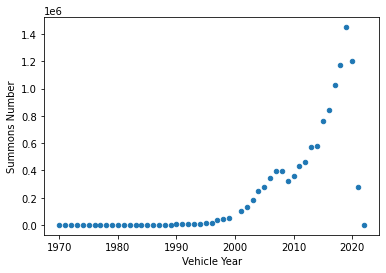

In [50]:
df_vehicle_yr.reset_index().plot.scatter(x='Vehicle Year', y='Summons Number')

In [66]:
# Analyze based on Violation Status
df_violation_status = df_parking_merged.loc[(df_parking_merged['Violation Status'] != 'HEARING PENDING') & 
                                            (df_parking_merged['Violation Status'] != np.nan)]

In [67]:
df_violation_status.groupby('Violation Status').count()

,Summons Number,Plate ID,Registration State,Vehicle Body Type,Vehicle Make,Vehicle Color,Vehicle Year,Violation Location,Violation Precinct,Violation,Fine Amount,Penalty Amount,Reduction Amount,Payment Amount,Amount Due
Violation Status,,,,,,,,,,,,,,,
ADMIN CLAIM DENIED,3012,0,0,0,0,0,0,0,0,3012,3012,3012,3012,3012,3012
ADMIN CLAIM GRANTED,69563,1,1,1,1,1,1,0,1,69560,69563,69563,69563,69563,69563
ADMIN REDUCTION,15281,1,1,1,1,0,1,0,1,15279,15281,15281,15281,15281,15281
APPEAL ABANDONED,965,0,0,0,0,0,0,0,0,965,965,965,965,965,965
APPEAL AFFIRMED,13031,0,0,0,0,0,0,0,0,13031,13031,13031,13031,13031,13031
APPEAL MODIFIED,92,0,0,0,0,0,0,0,0,92,92,92,92,92,92
APPEAL REMANDED,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1
APPEAL REVERSED,4189,2,2,2,2,2,2,1,2,4189,4189,4189,4189,4189,4189
HEARING ADJOURNMENT,18091,7,7,7,7,7,7,1,7,18091,18091,18091,18091,18091,18091


In [68]:
denied_cols = ['ADMIN CLAIM DENIED', 'APPEAL AFFIRMED', 'HEARING HELD-GUILTY']
reduced_cols = ['ADMIN REDUCTION', 'HEARING HELD-GUILTY REDUCTION']
granted_cols = ['ADMIN CLAIM GRANTED', 'APPEAL REVERSED', 'HEARING HELD-NOT GUILTY']

In [69]:
df_violation_status['Coded Violation Status'] = np.where(
    df_violation_status['Violation Status'].isin(denied_cols), 'Denied', np.where(
    df_violation_status['Violation Status'].isin(reduced_cols), 'Reduced', np.where(
    df_violation_status['Violation Status'].isin(granted_cols), 'Granted', 'Other')))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [70]:
df_violation_status['Coded Violation Status'].value_counts()

Other      11666859
Granted      843622
Denied       821225
Reduced      753799
Name: Coded Violation Status, dtype: int64

In [72]:
df_violation_status_dropped = df_violation_status.dropna(subset=['Violation Status'])
df_violation_status_dropped['Coded Violation Status'].value_counts()

Granted    843622
Denied     821225
Reduced    753799
Other       21041
Name: Coded Violation Status, dtype: int64

In [73]:
# Pickle for faster save/load time
df_violation_status_dropped.to_pickle(fp + 'df_violation_status_dropped.pkl')

In [ ]:
# Load pickled df
df_violation_status_dropped = pd.read_pickle(fp + 'df_violation_status_dropped.pkl')

In [70]:
df_violation_status_dropped.columns.values

array(['Summons Number', 'Plate ID', 'Registration State',
       'Vehicle Body Type', 'Vehicle Make', 'Vehicle Color',
       'Vehicle Year', 'Violation Location', 'Violation Precinct',
       'Violation', 'Violation Status', 'Fine Amount', 'Penalty Amount',
       'Reduction Amount', 'Payment Amount', 'Amount Due',
       'Coded Violation Status'], dtype=object)

In [74]:
cols = ['Coded Violation Status', 'Fine Amount', 'Penalty Amount',
       'Reduction Amount', 'Payment Amount', 'Amount Due']
df_violation_status_dropped[cols].groupby('Coded Violation Status').describe()

Fine Amount                                                        Penalty Amount                                                   Reduction Amount                                                        Payment Amount                                                          Amount Due                                                
                             count       mean        std   min   25%    50%    75%    max          count       mean        std  min  25%   50%   75%   max            count       mean        std  min   25%   50%     75%     max          count        mean        std  min   25%    50%     75%     max      count      mean       std  min  25%  50%  75%     max
Coded Violation Status                                                                                                                                                                                                                                                                                                                                               
Denied                    821225.0  83.638585  31.100303   0.0  65.0   65.0  115.0  515.0       821225.0  12.519687  21.154155  0.0  0.0   0.0  10.0  60.0         821225.0   0.565047   5.595157  0.0   0.0   0.0    0.00  715.20       821225.0   96.418009  36.928566  0.0  65.0  115.0  115.00  689.05   821225.0  0.001440  0.464859  0.0  0.0  0.0  0.0  209.00
Granted                   843622.0  72.115022  35.247368   0.0  35.0   65.0  115.0  515.0       843622.0   5.101035  12.140624  0.0  0.0   0.0  10.0  60.0         843622.0  77.274032  36.750008  0.0  45.0  65.0  115.00  691.68       843622.0    0.000077   0.070768  0.0   0.0    0.0    0.00   65.00   843622.0  0.000000  0.000000  0.0  0.0  0.0  0.0    0.00
Other                      21041.0  92.131315  81.884499  35.0  50.0   65.0  115.0  515.0        21041.0  20.557245  23.974540  0.0  0.0  10.0  30.0  60.0          21041.0   1.421078   9.691088  0.0   0.0   0.0    0.04  284.06        21041.0  114.656667  86.882199  0.0  65.0   95.0  125.28  653.66    21041.0  0.013568  1.212558  0.0  0.0  0.0  0.0  145.00
Reduced                   753799.0  90.970759  29.147563  25.0  65.0  115.0  115.0  515.0       753799.0   2.309064  10.084948  0.0  0.0   0.0   0.0  60.0         753799.0  24.932755  17.574402  0.0  15.0  23.0   33.00  409.95       753799.0   68.729448  34.531708  0.0  30.0   82.0  100.00  525.00   753799.0  0.000268  0.148259  0.0  0.0  0.0  0.0  116.11

In [78]:
# What types of violations are more likely to be reduced?
# df_violation_status_dropped['Violation'].unique()
df_violation_status_dropped_slice = df_violation_status_dropped.loc[df_violation_status_dropped['Coded Violation Status'] == 'Denied']
df_violation_status_dropped.groupby(['Violation', 'Coded Violation Status']).count()

Summons Number  Plate ID  Registration State  Vehicle Body Type  Vehicle Make  Vehicle Color  Vehicle Year  Violation Location  Violation Precinct  Violation Status  Fine Amount  Penalty Amount  Reduction Amount  Payment Amount  Amount Due
Violation                     Coded Violation Status                                                                                                                                                                                                                                                 
ALTERING INTERCITY BUS PERMIT Denied                               1         0                   0                  0             0              0             0                   0                   0                 1            1               1                 1               1           1
                              Granted                             23         0                   0                  0             0              0             0                   0                   0                23           23              23                23              23          23
                              Reduced                              3         0                   0                  0             0              0             0                   0                   0                 3            3               3                 3               3           3
ANGLE PARKING                 Denied                             794         0                   0                  0             0              0             0                   0                   0               794          794             794               794             794         794
                              Granted                            458         0                   0                  0             0              0             0                   0                   0               458          458             458               458             458         458
...                                                              ...       ...                 ...                ...           ...            ...           ...                 ...                 ...               ...          ...             ...               ...             ...         ...
WASH/REPAIR VEHCL-REPAIR ONLY Granted                              5         0                   0                  0             0              0             0                   0                   0                 5            5               5                 5               5           5
WRONG WAY                     Denied                             992         0                   0                  0             0              0             0                   0                   0               992          992             992               992             992         992
                              Granted                            591         0                   0                  0             0              0             0                   0                   0               591          591             591               591             591         591
                              Other                               18         0                   0                  0             0              0             0                   0                   0                18           18              18                18              18          18
                              Reduced                            907         0                   0                  0             0              0             0                   0                   0               907          907             907               907             907         907

[343 rows x 15 columns]

In [95]:
df_violation_status_dropped_trimmed = df_violation_status_dropped[['Violation', 'Coded Violation Status', 'Summons Number']]
groupby_cols = ['Violation', 'Coded Violation Status']
df_violation_grouped = df_violation_status_dropped_trimmed.groupby(groupby_cols).count()


In [91]:
df_violation_grouped['Pct'] = df_violation_grouped.groupby(
    groupby_cols)['Coded Violation Status'].count() / df_violation_grouped['Violation'].count() * 100

KeyError: 'Column not found: Coded Violation Status'

In [90]:
df_violation_grouped

Summons Number  Pct
Violation                     Coded Violation Status                     
ALTERING INTERCITY BUS PERMIT Denied                               1  NaN
                              Granted                             23  NaN
                              Reduced                              3  NaN
ANGLE PARKING                 Denied                             794  NaN
                              Granted                            458  NaN
...                                                              ...  ...
WASH/REPAIR VEHCL-REPAIR ONLY Granted                              5  NaN
WRONG WAY                     Denied                             992  NaN
                              Granted                            591  NaN
                              Other                               18  NaN
                              Reduced                            907  NaN

[343 rows x 2 columns]

In [99]:
df_violation_grouped = df_violation_grouped.reset_index()

In [101]:
df_violation_grouped.head(10)

,Violation,Coded Violation Status,Summons Number
0,ALTERING INTERCITY BUS PERMIT,Denied,1
1,ALTERING INTERCITY BUS PERMIT,Granted,23
2,ALTERING INTERCITY BUS PERMIT,Reduced,3
3,ANGLE PARKING,Denied,794
4,ANGLE PARKING,Granted,458
5,ANGLE PARKING,Other,15
6,ANGLE PARKING,Reduced,156
7,ANGLE PARKING-COMM VEHICLE,Denied,49
8,ANGLE PARKING-COMM VEHICLE,Granted,18
9,ANGLE PARKING-COMM VEHICLE,Reduced,11


In [83]:

df_violation_grouped['Pct'] = df_violation_grouped.groupby(
    groupby_cols)['Coded Violation Status'].count() / df_violation_grouped['Violation'].count() * 100
df_violation_status_dropped.describe()                                                                                                                

TypeError: incompatible index of inserted column with frame index

<AxesSubplot:xlabel='Coded Violation Status', ylabel='Summons Number'>

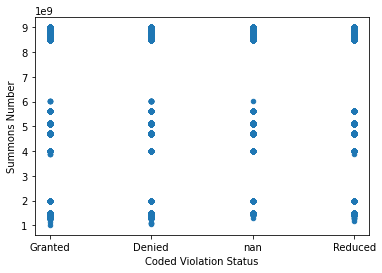

In [65]:
df_violation_status_dropped.plot.scatter(x='Coded Violation Status', y='Summons Number')